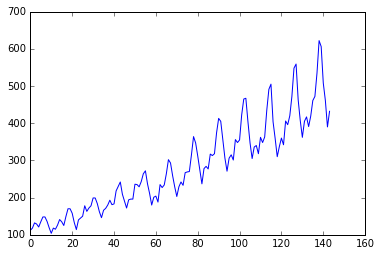

In [3]:
# loading the test data
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [4]:
# importing all we need
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

Using Theano backend.


In [5]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [6]:
# convert data to float (works better with NN)
dataset = dataset.astype('float32')

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(dataset), len(train), len(test))

144 96 48


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0461
Epoch 2/100
0s - loss: 0.0227
Epoch 3/100
0s - loss: 0.0160
Epoch 4/100
0s - loss: 0.0143
Epoch 5/100
0s - loss: 0.0134
Epoch 6/100
0s - loss: 0.0126
Epoch 7/100
0s - loss: 0.0116
Epoch 8/100
0s - loss: 0.0106
Epoch 9/100
0s - loss: 0.0095
Epoch 10/100
0s - loss: 0.0083
Epoch 11/100
0s - loss: 0.0071
Epoch 12/100
0s - loss: 0.0059
Epoch 13/100
0s - loss: 0.0048
Epoch 14/100
0s - loss: 0.0039
Epoch 15/100
0s - loss: 0.0031
Epoch 16/100
0s - loss: 0.0026
Epoch 17/100
0s - loss: 0.0024
Epoch 18/100
0s - loss: 0.0022
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0021
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0021
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0020
Epoch 29/100
0s - loss: 0.0021
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

In [17]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
trainScore = math.sqrt(trainScore)
trainScore = scaler.inverse_transform(numpy.array([[trainScore]]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = model.evaluate(testX, testY, verbose=0)
testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(numpy.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 127.14 RMSE
Test Score: 154.03 RMSE


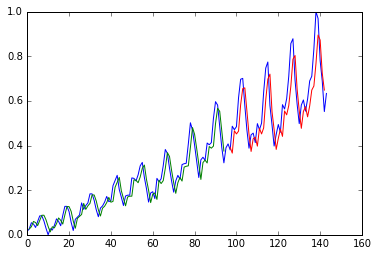

In [18]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
0s - loss: 0.0712
Epoch 2/100
0s - loss: 0.0363
Epoch 3/100
0s - loss: 0.0239
Epoch 4/100
0s - loss: 0.0196
Epoch 5/100
0s - loss: 0.0178
Epoch 6/100
0s - loss: 0.0164
Epoch 7/100
0s - loss: 0.0149
Epoch 8/100
0s - loss: 0.0136
Epoch 9/100
0s - loss: 0.0123
Epoch 10/100
0s - loss: 0.0110
Epoch 11/100
0s - loss: 0.0099
Epoch 12/100
0s - loss: 0.0087
Epoch 13/100
0s - loss: 0.0077
Epoch 14/100
0s - loss: 0.0069
Epoch 15/100
0s - loss: 0.0062
Epoch 16/100
0s - loss: 0.0056
Epoch 17/100
0s - loss: 0.0051
Epoch 18/100
0s - loss: 0.0047
Epoch 19/100
0s - loss: 0.0044
Epoch 20/100
0s - loss: 0.0042
Epoch 21/100
0s - loss: 0.0041
Epoch 22/100
0s - loss: 0.0039
Epoch 23/100
0s - loss: 0.0038
Epoch 24/100
0s - loss: 0.0037
Epoch 25/100
0s - loss: 0.0037
Epoch 26/100
0s - loss: 0.0037
Epoch 27/100
0s - loss: 0.0036
Epoch 28/100
0s - loss: 0.0036
Epoch 29/100
0s - loss: 0.0036
Epoch 30/100
0s - loss: 0.0035
Epoch 31/100
0s - loss: 0.0035
Epoch 32/100
0s - loss: 0.0034
Epoch 33/100
0s -

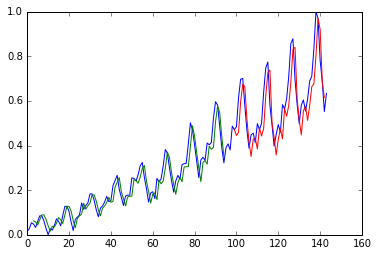

In [21]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
trainScore = math.sqrt(trainScore)
trainScore = scaler.inverse_transform(numpy.array([[trainScore]]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = model.evaluate(testX, testY, verbose=0)
testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(numpy.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()